# Show the variability of different PSD 

- overlay different PSD plots to show the anomalies

In [1]:
# down all ID normal data
def fun_plot(data, x_vector, xlabel : str, ylabel : str, title : str, save = True):
    plt.plot(x_vector,data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if save:
        plt.savefig(title + '.png')
    plt.show()    

In [44]:
import glob
import pickle
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

ID = 1

mydir = r"C:\Users\carbo\Documents\MIMII\ProcessedData\+6dB\psd\pump"
file_list = glob.glob(mydir + "/*.pkl")
filepath = Path(file_list[ID])
with open(filepath, 'rb') as f:
    x = pickle.load(f)


In [45]:
# retrieve the data
import numpy as np
train_data = x['train_set'] #.apply(lambda x: np.log(x))
#train_data = (train_data- train_data.min())/(train_data.max() -train_data.min())


test_data = x['test_set']


# get the abnormal data
abnormal_data = test_data[test_data['labels'] == 0]
# drop the labels 
abnormal_data = abnormal_data.drop(columns = 'labels')

In [46]:
def line_plotter_all(df : pd.DataFrame, ylim = (0.5,1)):
    index_names = df.index.tolist()
    for name in index_names:
        row = df.loc[name, :]
        row.plot(kind='line', ylim = ylim)
    plt.show()

<AxesSubplot:>

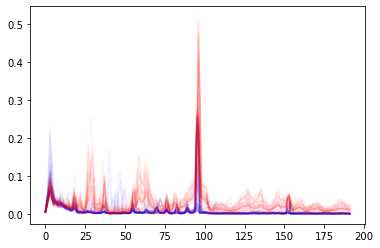

In [50]:
fig,ax = plt.subplots()
train_data.iloc[50:100,:].T.plot(kind='line', alpha=0.05, legend=False, color = 'blue', ax=ax)
abnormal_data.iloc[60:100,:].T.plot(kind='line', alpha=0.05, legend = False, color = 'red', ax=ax)

<AxesSubplot:>

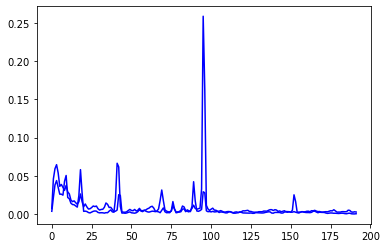

In [48]:
train_data.iloc[8:10,:].T.plot(kind='line', alpha=1, legend=False, color = 'blue')